<a href="https://colab.research.google.com/github/cnrhkdgus95gmailcom/SHI-DT-Campus/blob/main/MyNote_0525_%EC%88%98_%EB%82%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 랜덤으로 컴퓨터가 가위/바위/보 결정. ; random
# 2. 입력값을 받아서 이겼는지, 비겼는지, 졌는지 판단. ; if
# 3. 5판을 한다. 이기면 3점. 비기면 0점. 지면 -1점
# 4. 5판이 끝났을 때 내 점수가 출력됨. (imo 컴퓨터 점수도?)
# 5. 매번 실행할 때마다 점수에 대한 정보는 저장함. ; 
# 6. 저장된 정보로부터 게임이 끝날때마다 랭킹 출력 (제일 어려울 수 있습니다)
# 7. open 또는 pickle
# 8. 현재 조건으로는 랭킹 길이가 한정될 수 있음...

# cf ) choice 함수로 문자열로 받아들일 수도 있다.

In [ ]:
import pickle #알아두면 좋습니다
#저장하고 불러오는 기능

a=[1,2,3,4,5]

f = open('my_data.txt','wb') # write binary
pickle.dump(a, f)
f.close()

가위바위보 게임

In [ ]:
import random
import pickle

print('''컴퓨터와 가위바위보 게임을 합니다. 
이기면 3점. 비기면 0점. 지면 -1점입니다. 게임은 5판 이루어집니다.
가위는 1을 입력, 바위는 2를 입력, 보는 3을 입력합니다.''')

가위 = 1
바위 = 2
보 = 3

현재_나의_점수 = 0

#예외처리
try:
    f = open('rankinglist.txt','rb')
    rankinglist = pickle.load(f)
    f. close()
except:
    rankinglist = [0]

rankinglist.sort(reverse=True)

while True:

    print(f'지난 게임에서의 점수들을 내림차순으로 정렬:{rankinglist}')

    print("\n새 게임 시작!")
    
    for i in range(5):
                
        나 = int(input('''1,2,3 중 하나를 골라주세요: '''))

        컴퓨터 = random.sample(range(1,4),1) 

        if 컴퓨터 == [1]:
            if 나 == 1:
                현재_나의_점수 += 0
            elif 나 == 2:
                현재_나의_점수 += 3
            else: # 나 == 3
                현재_나의_점수 += -1

        elif 컴퓨터 == [2]:
            if 나 == 1:
                현재_나의_점수 += -1
            elif 나 == 2:
                현재_나의_점수 += 0
            else: # 나 == 3
                현재_나의_점수 += 3

        else: # 컴퓨터 == 3
            if 나 == 1:
                현재_나의_점수 += 3
            elif 나 == 2:
                현재_나의_점수 += -1
            else: # 나 == 3
                현재_나의_점수 += 0

        print(f'현재 나의 점수는 {현재_나의_점수}점 입니다.')

    print(f'이번 게임에서의 나의 최종 점수:{현재_나의_점수}')
    
    rankinglist.append(현재_나의_점수)
    f = open('rankinglist.txt','wb')
    pickle.dump(rankinglist, f)
    f.close()
       
    
    
    



In [ ]:
# import random
# for i in range(5):
#     com = random.choice(['가위','바위','보'])
#     me = input('가위/바위/보: ')

#     if com == me:
#         print('비겼습니다.')
#         continue
#     if me == '바위' and com == '가위':
#         print('이겼습니다.')
#         score += 3

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips

In [ ]:
tips.info()

category는 문자열이랑은 좀 다름... category가 훨씬 속도가 빠르더라.
문자열은 object였고....

In [ ]:
tips['sex_str'] = tips['sex'].astype(str) # column의 원소들을 object로 변환한다.
tips
tips.info()

In [ ]:
#total_bill 얘네를 문자열 열로 변환해서 새로운 열에 넣어보자.
#문자열이라서 연산이 안됨

tips['totalBill_str'] = tips['total_bill'].astype(str)
tips.info()
# 9   totalBill_str  244 non-null    object  


In [ ]:
# totalBill_str을 다시 변환해보자
tips['totalBill_str'] = tips['totalBill_str'].astype('category')
tips.info()

데이터 크롤링

파이썬으로하면 쉬워진다.

컴퓨터가 스스로 검색해서 가져와서 엑셀에 저장하는 기능을 만들어보자.

정확성이 장점.

생각보다 쉬워요.

검색하는 과정을 생각해보자.

로또 적고 엔터를 치면, 서버에 로또 페이지 보여달라고 요청.

서버가 안전하다고 판단되면 페이지를 보여주는거죠.

파이썬 창을 가지고 어떻게 요청할까?

import request 사용할거임.

In [3]:
from bs4 import BeautifulSoup # python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")

url



<Response [200]>

Response [200]가 정상

400번대가 존재하지 않는 페이지

500번대는 조건이 필요한 페이지 ; 거절당한경우

우리가 궁금한건 내용이죠...
url.text 로 페이지 내용 보자.

In [27]:
url.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="unix unknown ">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="로또 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&q=%EB%A1%9C%EB%98%90" />\n<meta property="og:description" content="Daum 검색에서 로또에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>로또 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" ti

원하는 데이터를 얻기 위해

데이터 전처리를 해보자.

전처리가 데이터분석의 90%를 차지한다 해도 무방함.

url.text 까지는
아직 html이 아닌 문자열임.

이 문자열을 html ; hypertext markup language로 변환해보자.

In [28]:
html = BeautifulSoup(url.text)
html

<!DOCTYPE html>
<html class="unix unknown " lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="로또 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=tot&amp;q=%EB%A1%9C%EB%98%90" property="og:url"/>
<meta content="Daum 검색에서 로또에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>로또 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/commo

어떤 웹사이트 공지사항에 크롤링 하지 말라고 명시되었으면 하지 맙시다.

상업적으로 이용하시면 안되고...

그리고 while문에 get 하셔도 안됩니다...

1초에 만번씩 요구하는... 서버 공격하는 것임. ip 차단당한다.

데이터 훔쳐가는 입장이니까 천천히 가져가자...

1초에 몇번이상 요청하면 차단당하는 기준 있더라...

1초에 한번씩 요청해보자.

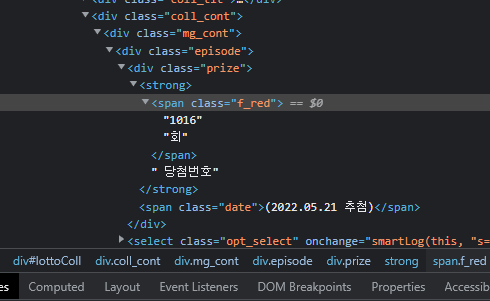



span 하나로만 찾으면 제대로 못찾겠네.

storng 안에 span 있어야 겠고.

div class prize 이면서 strong 이면서 span인 것으로 찾아보자...

만약 다른것도 같이 찾아지면 하나 더 위로 올라가고...

In [29]:
html.find('div', class_ = 'prize')

<div class="prize"> <strong><span class="f_red">1016회</span> 당첨번호</strong> <span class="date">(2022.05.21 추첨)</span> </div>

바로 찾았네요. 1016이 보이죠.

In [30]:
html.find('div', class_ = 'prize').find('strong').find('span', class_ = 'f_red')

# 이건 beautiful soup 특징이니까 받아들이자.

<span class="f_red">1016회</span>

계속 깊숙히 찾아 들어가는...

주로 class로 찾아들어갈 예정임

In [31]:
current = html.find('div', class_ = 'prize').find('strong').find('span', class_ = 'f_red')
current

<span class="f_red">1016회</span>

span class="f_red"  ; 메인 태그라 부름

1016 이걸 가져와야겠네


In [32]:
current = int(current.text.replace('회',''))
current

1016

컴퓨터가 현재 회차를 알고 있어야 1회차부터 현재회차까지 검색

실습을 해보자.

숫자 15만 가져와보자


In [4]:
from bs4 import BeautifulSoup # python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")

url.text
html = BeautifulSoup(url.text)
current = html.find('div', class_ = 'lottonum').find('span', class_ = 'ball')
# find는 제일 가까운 태그를 찾는다.
current = int(current.text)
current

15

In [45]:
from bs4 import BeautifulSoup # python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")

url.text
html = BeautifulSoup(url.text)
current = html.find('div', class_ = 'lottonum').find_all('span')
current

[<span class="ball bg_ball2">15</span>,
 <span class="ball bg_ball3">26</span>,
 <span class="ball bg_ball3">28</span>,
 <span class="ball bg_ball4">34</span>,
 <span class="ball bg_ball5">41</span>,
 <span class="ball bg_ball5">42</span>,
 <span class="ball txt_bonus"><span class="screen_out">보너스</span></span>,
 <span class="screen_out">보너스</span>,
 <span class="ball bg_ball5">44</span>]

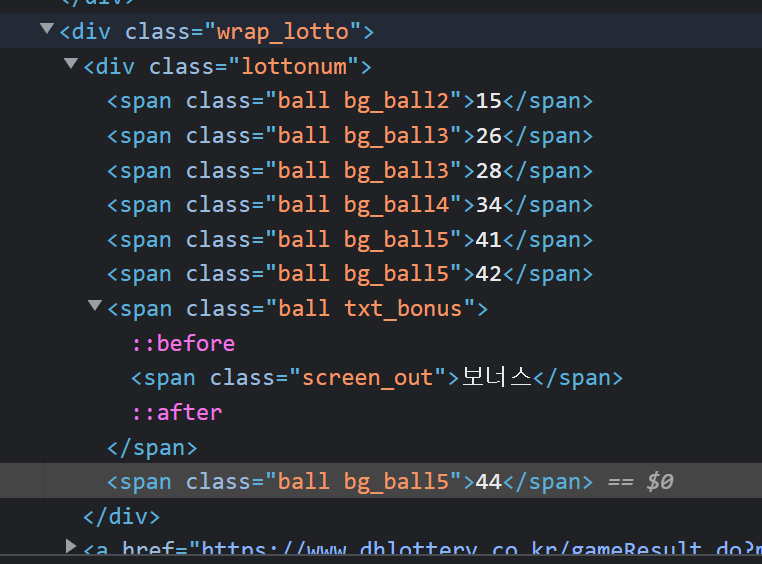

In [10]:
from bs4 import BeautifulSoup 
# BeautifulSoup 는 python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")

url.text
html = BeautifulSoup(url.text)
numList = html.find('div', class_ = 'lottonum')
numList


<div class="lottonum"> <span class="ball bg_ball2">15</span> <span class="ball bg_ball3">26</span> <span class="ball bg_ball3">28</span> <span class="ball bg_ball4">34</span> <span class="ball bg_ball5">41</span> <span class="ball bg_ball5">42</span> <span class="ball txt_bonus"><span class="screen_out">보너스</span></span> <span class="ball bg_ball5">44</span> </div>

In [11]:
from bs4 import BeautifulSoup 
# BeautifulSoup 는 python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")

url.text
html = BeautifulSoup(url.text)
numList = html.find('div', class_ = 'lottonum').text.split()
numList

['15', '26', '28', '34', '41', '42', '보너스', '44']

In [58]:
from bs4 import BeautifulSoup 
# BeautifulSoup 는 python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")

url.text
html = BeautifulSoup(url.text)
numList = html.find('div', class_ = 'lottonum').text.split()
del numList[6]
# for i in range(len(numList)):
#     numList[i] = int(numList[i])
# 또는...
# box = []
# for i in numbers:
#     box.append(i)
#
numList = list(map(int, numList)) # map 함수를 잘 써보자.
numList

[15, 26, 28, 34, 41, 42, 44]

In [5]:
from bs4 import BeautifulSoup # python으로 html을 다루는 라이브러리
# hypertext markup language

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")
current = html.find('div', class_ = 'prize').find('strong').find('span', class_ = 'f_red')
current = int(current.text.replace('회',''))

for n in range(1, current+1):
    url = requests.get("https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q=999%ED%9A%8C%EC%B0%A8%20%EB%A1%9C%EB%98%90")
    # 여기선 999 가 회차임을 알 수 있다...

KeyboardInterrupt: ignored

time.sleep( )없이 실행하면 너무 빨리 요청하는거라서 하면 안되고...

이제 로또 번호를 1회차부터 현재회차까지 크롤링하는것을 처음부터 해보자.

파이썬은 태그만 찾으면 되서 편하더라...

In [5]:
from bs4 import BeautifulSoup # BeautifulSoup
# BeautifulSoup ; python으로 html(hypertext markup language)을 다루는 라이브러리

import requests
import time
import pandas as pd

url = requests.get("https://search.daum.net/search?w=tot&DA=UMZ&t__nil_searchbox=suggest&sug=topex&sugo=16&sq=%EB%A1%9C%EB%98%90&o=1&q=%EB%A1%9C%EB%98%90")
# www.daum.net 메인 검색창에 '로또'를 검색함
html = BeautifulSoup(url.text) 
# BeautifulSoup를 활용하여 url(txt)을 html로 변환

numOfnow = html.find('div', class_ = 'prize').find('strong').find('span', class_ = 'f_red')
# 현재 회차인 1016회을 html 에서 찾는 과정 

numOfnow = int(numOfnow.text.replace('회',''))
# '회'를 지우고 int로 자료형 변환

# 이제 컴퓨터는 numOfnow가 'x 회' 의 x라는 정수임을 알게 되었다.

lotto_total = []

for x in range(1, numOfnow + 1):
    
    url = requests.get(f"https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={x}%ED%9A%8C%EC%B0%A8%20%EB%A1%9C%EB%98%90")
    # n ; 회차
    # 특징적인 숫자(ex:999)를 넣고 찾았음

    html = BeautifulSoup(url.text) 
    # BeautifulSoup를 활용하여 url(txt)을 html로 변환

    numList = html.find('div', class_ = 'lottonum').text.split()
    del numList[6]
    numList = list(map(int, numList))

    lotto_total.append(numList)
    print(f'{x}회차 로또 데이터 저장완료:{numList}')
    
    time.sleep(1) # 이게 있어야 합니다...!

1회차 로또 데이터 저장완료:[10, 23, 29, 33, 37, 40, 16]
2회차 로또 데이터 저장완료:[9, 13, 21, 25, 32, 42, 2]
3회차 로또 데이터 저장완료:[11, 16, 19, 21, 27, 31, 30]
4회차 로또 데이터 저장완료:[14, 27, 30, 31, 40, 42, 2]
5회차 로또 데이터 저장완료:[16, 24, 29, 40, 41, 42, 3]
6회차 로또 데이터 저장완료:[14, 15, 26, 27, 40, 42, 34]
7회차 로또 데이터 저장완료:[2, 9, 16, 25, 26, 40, 42]
8회차 로또 데이터 저장완료:[8, 19, 25, 34, 37, 39, 9]
9회차 로또 데이터 저장완료:[2, 4, 16, 17, 36, 39, 14]
10회차 로또 데이터 저장완료:[9, 25, 30, 33, 41, 44, 6]
11회차 로또 데이터 저장완료:[1, 7, 36, 37, 41, 42, 14]
12회차 로또 데이터 저장완료:[2, 11, 21, 25, 39, 45, 44]
13회차 로또 데이터 저장완료:[22, 23, 25, 37, 38, 42, 26]
14회차 로또 데이터 저장완료:[2, 6, 12, 31, 33, 40, 15]
15회차 로또 데이터 저장완료:[3, 4, 16, 30, 31, 37, 13]
16회차 로또 데이터 저장완료:[6, 7, 24, 37, 38, 40, 33]
17회차 로또 데이터 저장완료:[3, 4, 9, 17, 32, 37, 1]
18회차 로또 데이터 저장완료:[3, 12, 13, 19, 32, 35, 29]
19회차 로또 데이터 저장완료:[6, 30, 38, 39, 40, 43, 26]
20회차 로또 데이터 저장완료:[10, 14, 18, 20, 23, 30, 41]
21회차 로또 데이터 저장완료:[6, 12, 17, 18, 31, 32, 21]
22회차 로또 데이터 저장완료:[4, 5, 6, 8, 17, 39, 25]
23회차 로또 데이터 저장완료:[5, 13, 17, 